In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# combines both DT and NN output and places them next to each other
ytest = pd.read_csv('ytest.csv').drop(columns=['Unnamed: 0'])
df = pd.DataFrame()
df['DT_output']=np.array(pd.read_csv('DT_out_new2.csv')).ravel()
df['NN_output']=np.array(pd.read_csv('NN_out_new2.csv')).ravel()

#splits
X_train, X_test, y_train, y_test = train_test_split(df, np.array(ytest).ravel(), test_size=.20)

In [3]:
# Decision Tree Classifier - 5 levels in tree
dt = DecisionTreeClassifier(max_depth=5) 
# Fit DT to the training data
dt.fit(X_train, y_train) 

# Make predictions of X test 
y_test_pred = dt.predict(X_test)

# Test set - Accuracy
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test Set Accuracy: %s' % dt_test_accuracy)

Test Set Accuracy: 0.875


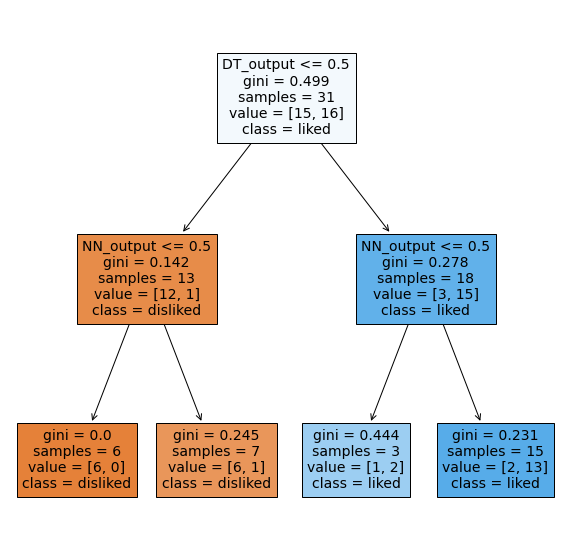

In [4]:
from sklearn import tree

fig = plt.figure(figsize=(10,10))
blah = tree.plot_tree(dt, 
                feature_names=X_train.columns,
                      class_names=['disliked', 'liked'],
                   filled=True)

In [5]:
# Multilayer Perceptron Classifier - 
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Predictions
y_test_pred = mlp.predict(X_test)

# Test set - Accuracy
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) 

print('Test Set Accuracy: %s' % mlp_test_accuracy)

Test Set Accuracy: 0.875


In [6]:
model_list = [('dt',dt),('mlp',mlp) ]

# Stack model
stack_model = StackingClassifier(estimators=model_list, final_estimator=LogisticRegression())

# Fit stacked_model to the training data
stack_model.fit(X_train, y_train)

# Predictions
y_test_pred = stack_model.predict(X_test)

# Test set - Accuracy
stack_test_accuracy = accuracy_score(y_test, y_test_pred) 

print('Test Set Accuracy: %s' % stack_test_accuracy)

Test Set Accuracy: 0.875


In [7]:
# Accuracy Test List
acc_test_list = {
'dt': dt_test_accuracy,
'mlp': mlp_test_accuracy,
'stack': stack_test_accuracy}

In [8]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
acc_df
acc_df.to_csv('Stacked Results.csv')